In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
def prettyshow(grads,legend,save='image.pdf',ylabel='Gradient Norm',title='A'):
    # plot the results
    plt.rcParams['figure.figsize'] = 5, 4
    plt.figure()
    xlen = len(grads[0])
    colors = ['green', 'red', 'blue', 'orange', 'purple', 'cyan']
    markers = ['d', '^', 'o', '<', '*', 's']
    idx_set = np.arange(0, xlen, xlen//10)
    for i in range(len(grads)):
        plt.semilogy(0, grads[i][0], color=colors[i], marker=markers[i], markersize = 7)
    for i in range(len(grads)):
        for idx in idx_set:
            plt.semilogy(idx, grads[i][idx], color=colors[i], marker=markers[i], markersize = 7, linestyle = 'None')
    for i in range(len(grads)):
        plt.semilogy(np.arange(xlen), grads[i], linewidth=1.0, color=colors[i])
    plt.legend(legend, fontsize=12)
    plt.xlabel('Epoch', fontsize = 12)
    plt.ylabel(ylabel, fontsize = 12)
    plt.grid(True)
    plt.title(title, fontsize=12)

    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.savefig(save)
    plt.show()

In [3]:
# 图1：pulldiag在di_ring(n=5)+三种不同异质性的表现(注：现在只弄了两种异质性，均匀分布和完全异质分布。能不能弄一个稍微混合一点的数据分布？比如在完全异质分布条件下，让1，2号节点数据混合一下。

In [4]:
df_U=pd.read_csv("/home/bluefog/GanLuo/PullSum_MNIST/code/神经网络实验/输出结果存放_画图使用/4layer_Diag_di_ring(n=5)的三种不同异质性表现/diag_U.csv")
df_H=pd.read_csv("/home/bluefog/GanLuo/PullSum_MNIST/code/神经网络实验/输出结果存放_画图使用/4layer_Diag_di_ring(n=5)的三种不同异质性表现/diag_H.csv")
df_M=pd.read_csv("/home/bluefog/GanLuo/PullSum_MNIST/code/神经网络实验/输出结果存放_画图使用/4layer_Diag_di_ring(n=5)的三种不同异质性表现/diag_M.csv")

In [8]:
df_M

,Diag_l2,Diag_a2
0,1.789700,0.2566
1,1.430771,0.4202
2,1.144902,0.4571
3,1.121195,0.4476
4,2.950791,0.4891
...,...,...
995,0.188167,0.9422
996,0.186817,0.9421
997,0.187685,0.9423
998,0.188211,0.9425


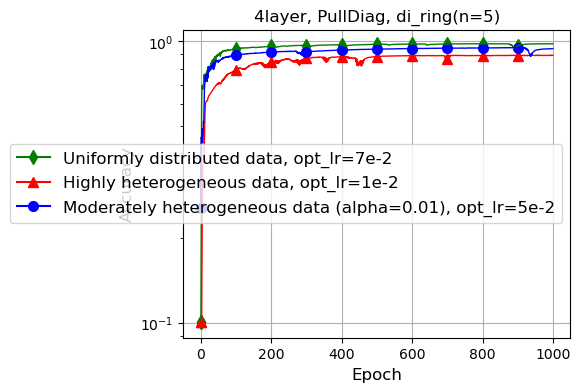

In [11]:
grads=[df_U['Diag_a0'],df_H['Diag_a1'],df_M['Diag_a2']]
legend = ['Uniformly distributed data, opt_lr=7e-2', 
          'Highly heterogeneous data, opt_lr=1e-2', 
          'Moderately heterogeneous data (alpha=0.01), opt_lr=5e-2']
prettyshow(grads, legend, save='gradients_plot.pdf', ylabel='Accuracy',title='4layer, PullDiag, di_ring(n=5)')